In [1]:
import syft as sy

# Part 1: Launch a Duet Server

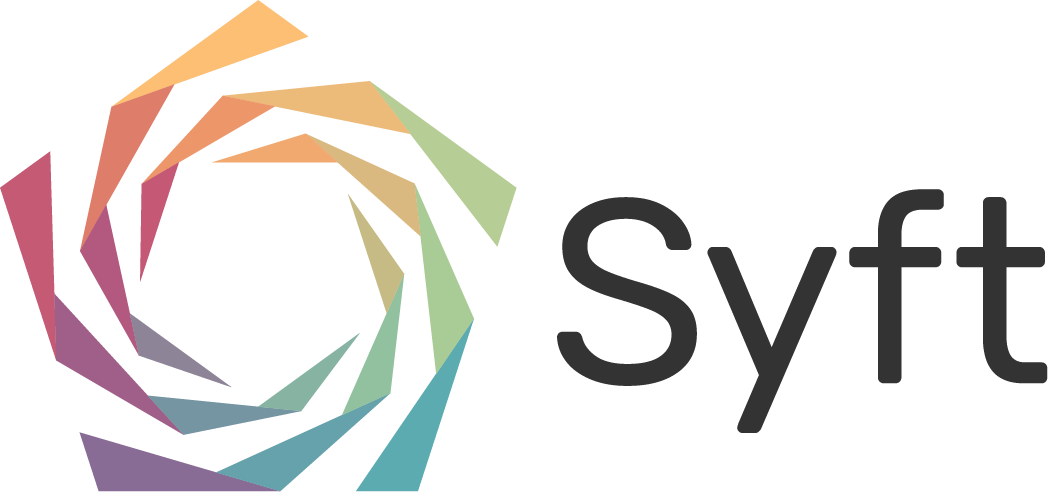

🎤  🎸  ♪♪♪ Starting Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ >             Use at your own risk.
♫♫♫ >
♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-216-8-163.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... DONE!
♫♫♫ >
♫♫♫ > STEP 1: Send the following code to your Duet Partner!

import syft as sy
duet = sy.duet("ce8c31dbbd96debc811016f8dc618824")

♫♫♫ > STEP 2: Running the code above will print out a 'Client ID'.
♫♫♫ >         Have your duet partner send it to you and enter it below!

Running loopback mode. Use sy.join_duet(loopback=True) on the other side.
♫♫♫ > Connecting...
♫♫♫ > ...using a running event loop...

♫♫♫ > CONNECTED!

♫♫♫ > DUET LIVE STATUS  *  Objects: 0  Requests: 0   Messages: 0                                data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
♫♫♫ > DUET LIVE STATUS  *  O

In [2]:
duet = sy.launch_duet(loopback=True)

# Part 2: Upload data to Duet Server

Let's say the data owner has a dataset of Iris flowers. He will upload the data to the duet server for other data scientists to use.

In [3]:
from sklearn import datasets
import torch as th

♫♫♫ > DUET LIVE STATUS  *  Objects: 0  Requests: 0   Messages: 0                                

In [4]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

Flower species mappings:
1. "Iris-setosa": 0,
2. "Iris-versicolor": 1,
3. "Iris-virginica": 2

Flower features:
1. sepal length (cm)
2. sepal width (cm)
3. petal length (cm)
4. petal width (cm)

In [14]:
print("data:")
print(X[0:5])

data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [15]:
print("target:")
print(y)

target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [16]:
print("Length of dataset:", len(X))

Length of dataset: 150


In [17]:
print(type(X))

<class 'numpy.ndarray'>


For doing machine learning using torch, we need the data to be converted to FloatTensors. Here, the data owner is explicitly doing the conversion before uploading the data. If he doesn't do that, it has to be converted in the data scientist's end as you've seen in the previous exercise.

In [18]:
X = th.FloatTensor(X)
y = th.FloatTensor(y)

♫♫♫ > DUET LIVE STATUS  *  Objects: 0  Requests: 0   Messages: 0                                

In [19]:
print(type(X))

<class 'torch.Tensor'>


In [20]:
X = X.tag("iris-data")
y = y.tag("iris-target")

X = X.describe(
    "This is a dataset for flower classification of 150 samples. 4 Features are sepal length (cm)," 
    "sepal width (cm), petal length (cm), petal width (cm)"
)
y = y.describe("Labels for flowers: Iris-setosa, Iris-versicolour, Iris-virginica")

In [21]:
data_pointer = X.send(duet, searchable=True)
target_pointer = y.send(duet, searchable=True)

In [22]:
# Once uploaded, the data owner can see the object stored in the tensor
duet.store

[<syft.proxy.torch.TensorPointer object at 0x7fd294fdaac0>, <syft.proxy.torch.TensorPointer object at 0x7fd294fdac70>]

In [23]:
# To see it in a human-readable format, data owner can also pretty-print the tensor information
duet.store.pandas

ID           Tags  \
0  <UID: d168aa62d00b49a7a0549d1d7cc84feb>    [iris-data]   
1  <UID: cb6471e840f3412f927d14004ac1ba65>  [iris-target]   

                                         Description  
0  This is a dataset for flower classification of...  
1  Labels for flowers: Iris-setosa, Iris-versicol...

# Part 3: Response to requests coming from Data Scientist

The data owner can add requests to be accepted or denied by adding them to request handlers. If he doesn't specify a `name`, then all the requests will be accepted.

In [24]:
duet.requests.add_handler(action="accept")

### <img src="https://github.com/OpenMined/design-assets/raw/master/logos/OM/mark-primary-light.png" alt="he-black-box" width="100"/> Checkpoint 1 : Well done!